In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Property Price Prediction Using Linear Regression

# A dataset related to real estate or property values. Here's what these features typically represent:

1. crime_rate: The rate of crime in the area.
2. zone: The zoning classification of the property (e.g., residential, commercial).
3. industry: The level of industrial activity in the vicinity.
4. near_river: A binary indicator for proximity to a river.
5. pollution_level: Pollution level in the area.
6. rooms: The number of rooms in the property.
7. age: The age of the property or buildings in the area.
8. city_distance: Distance from the property to the city center.
9. highway_connection: A binary indicator for highway accessibility.
10. tax_rate: Property tax rate.
11. st_ratio: Student-teacher ratio in nearby schools.
12. black_pop: The percentage of the Black population in the area.
13. lower_stat: A measure of the percentage of lower socio-economic status residents in the area.
14. price: The property price or value.

In [3]:
data= pd.read_csv('data.csv')
data.head()

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.head(10)

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,NaN,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
data.tail(10)

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
data.isnull().sum()

crime_rate             0
zone                   0
industry               0
near_river             0
pollution_level       10
rooms                  5
age                    0
city_distance          0
highway_connection     0
tax_rate               0
st_ratio               0
black_pop             10
lower_stat            16
price                  0
dtype: int64

In [7]:
pollution= data['pollution_level']
pollution.head(5)

0    0.538
1    0.469
2    0.469
3    0.458
4    0.458
Name: pollution_level, dtype: float64

In [8]:
poll_mean= pollution.mean()
poll_mean

0.5554570564516129

In [9]:
pollution.fillna(poll_mean, inplace= True)
pollution

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: pollution_level, Length: 506, dtype: float64

In [10]:
rm= data['rooms']
rm.head(5)

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: rooms, dtype: float64

In [11]:
rm_mean= rm.mean()
rm_mean

6.288027944111776

In [12]:
rm.fillna(rm_mean, inplace= True)
rm

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rooms, Length: 506, dtype: float64

In [13]:
black= data['black_pop']
black

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: black_pop, Length: 506, dtype: float64

In [14]:
b_mean= black.mean()
b_mean

359.93637096774194

In [15]:
black.fillna(b_mean, inplace= True)
black

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: black_pop, Length: 506, dtype: float64

In [16]:
state= data['lower_stat']
state

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: lower_stat, Length: 506, dtype: float64

In [17]:
state_mean= state.mean()
state_mean

12.57965306122449

In [18]:
state.fillna(state_mean, inplace= True)
state

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: lower_stat, Length: 506, dtype: float64

In [19]:
data.isnull().sum()

crime_rate            0
zone                  0
industry              0
near_river            0
pollution_level       0
rooms                 0
age                   0
city_distance         0
highway_connection    0
tax_rate              0
st_ratio              0
black_pop             0
lower_stat            0
price                 0
dtype: int64

In [20]:
data.shape

(506, 14)

In [21]:
data.describe(include= 'all')

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.555457,6.288028,68.574901,3.795043,9.549407,408.237154,18.455534,359.936371,12.579653,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115492,0.699875,28.148861,2.105710,8.707259,168.537116,2.164946,86.049605,7.088461,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.240000,7.037500,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.465000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.560000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

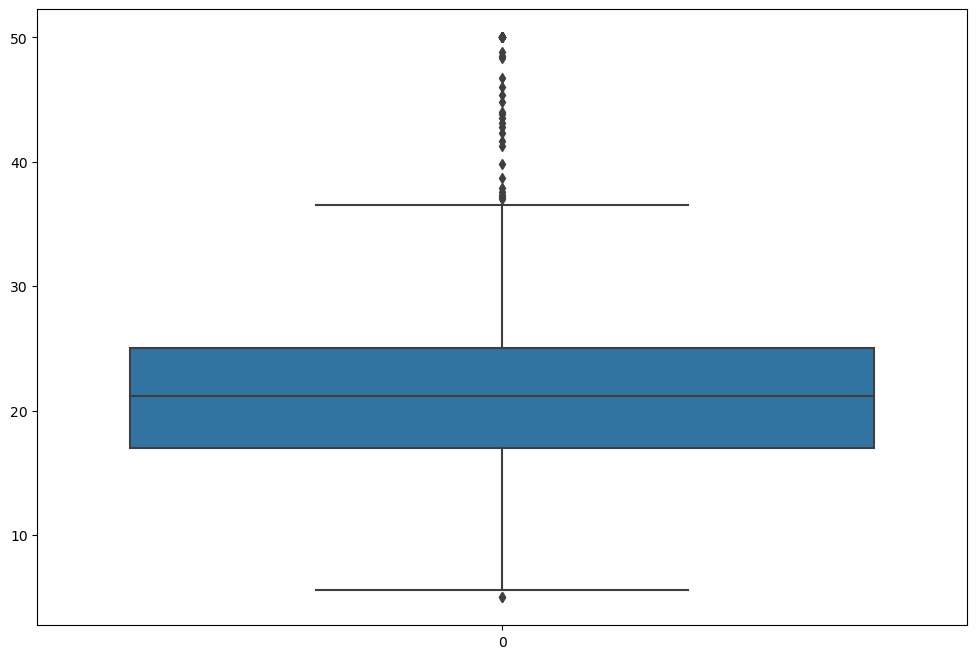

In [22]:
plt.figure(figsize=[12,8])
sns.boxplot(data['price'])

<Axes: ylabel='Frequency'>

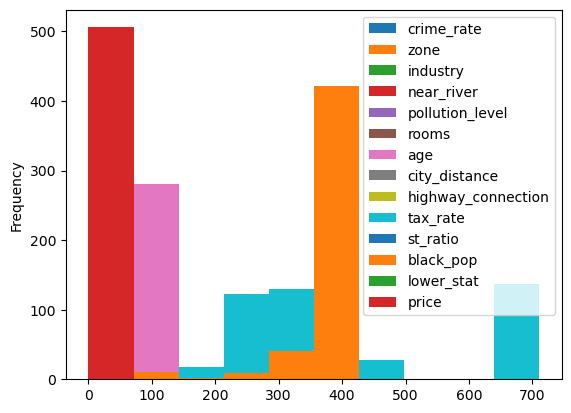

In [23]:
data.plot(kind='hist')

In [24]:
data.columns

Index(['crime_rate', 'zone', 'industry', 'near_river', 'pollution_level',
       'rooms', 'age', 'city_distance', 'highway_connection', 'tax_rate',
       'st_ratio', 'black_pop', 'lower_stat', 'price'],
      dtype='object')

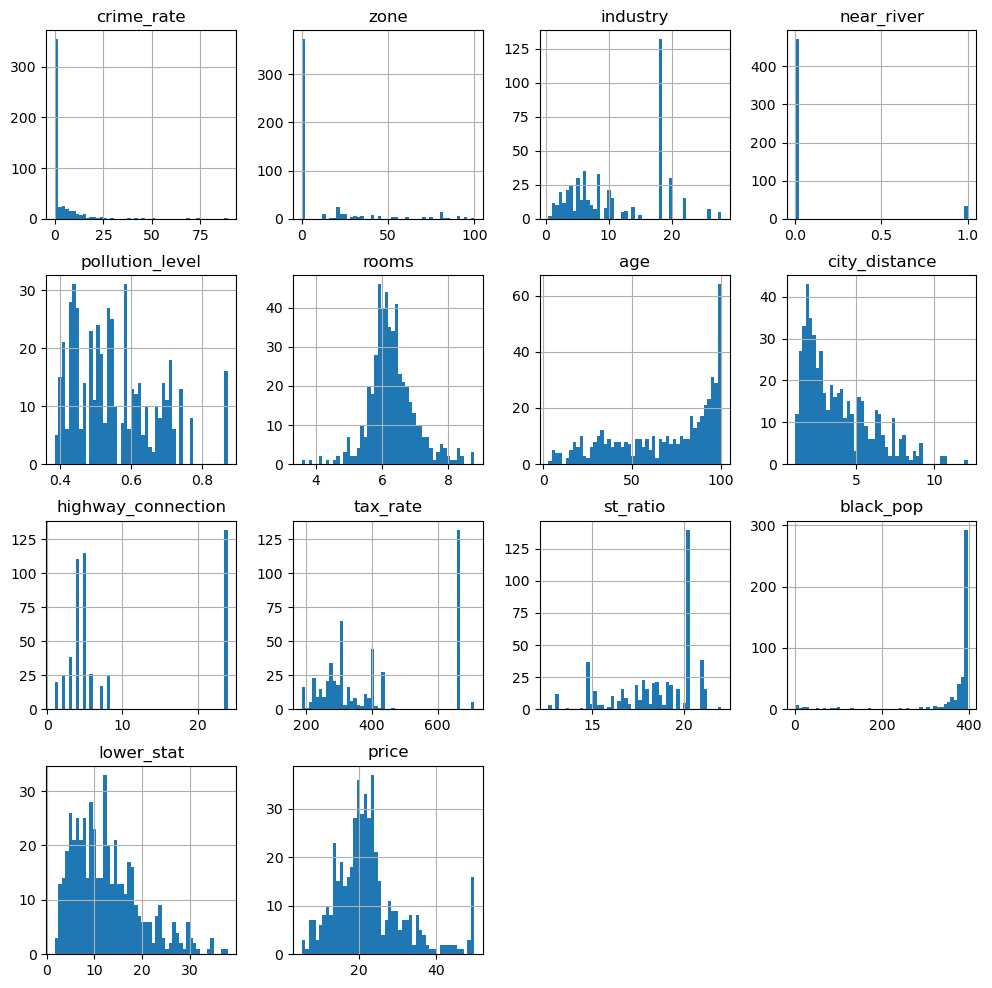

In [25]:
data.hist(bins=50, figsize= (12, 12))
plt.show()

<Figure size 1200x800 with 0 Axes>

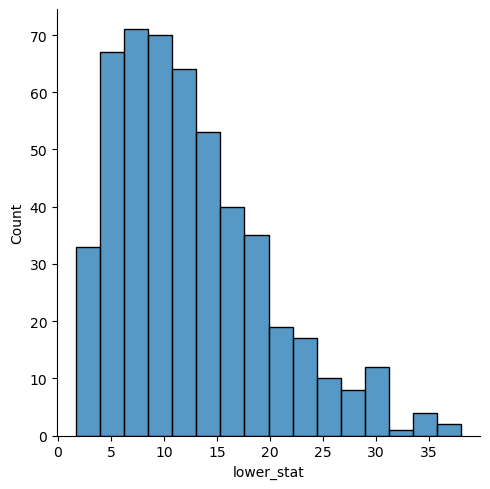

In [26]:
plt.figure(figsize=[12,8])
sns.displot(data['lower_stat'])

<Axes: xlabel='price', ylabel='Count'>

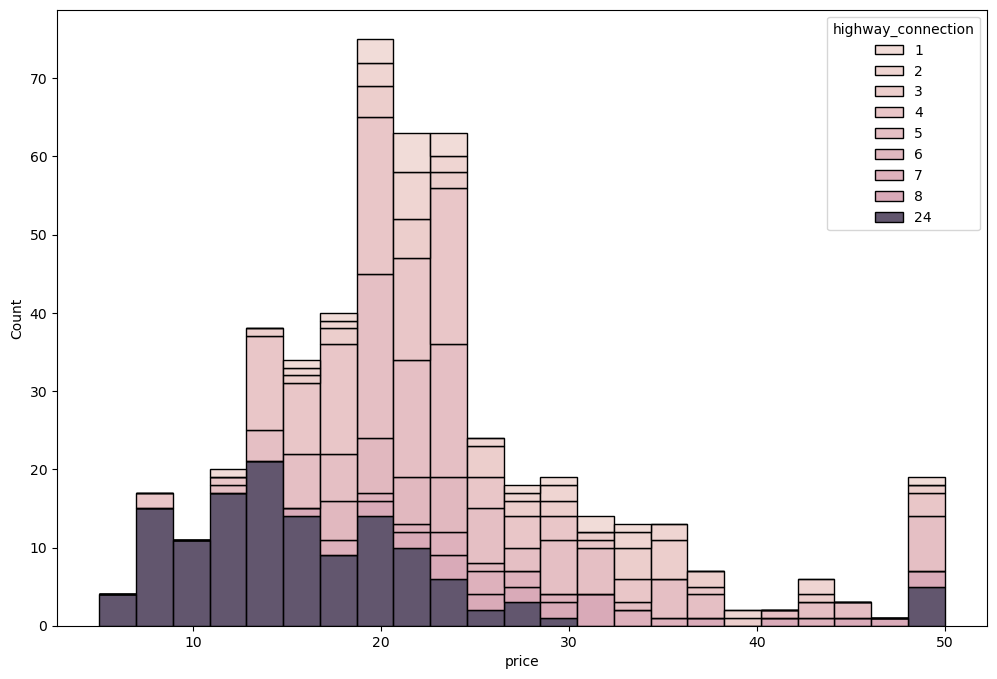

In [27]:
plt.figure(figsize=[12,8])
sns.histplot(data=data, x='price', hue= 'highway_connection', multiple='stack')

C:\Users\Grace\AppData\Local\Temp\ipykernel_800\3747828434.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

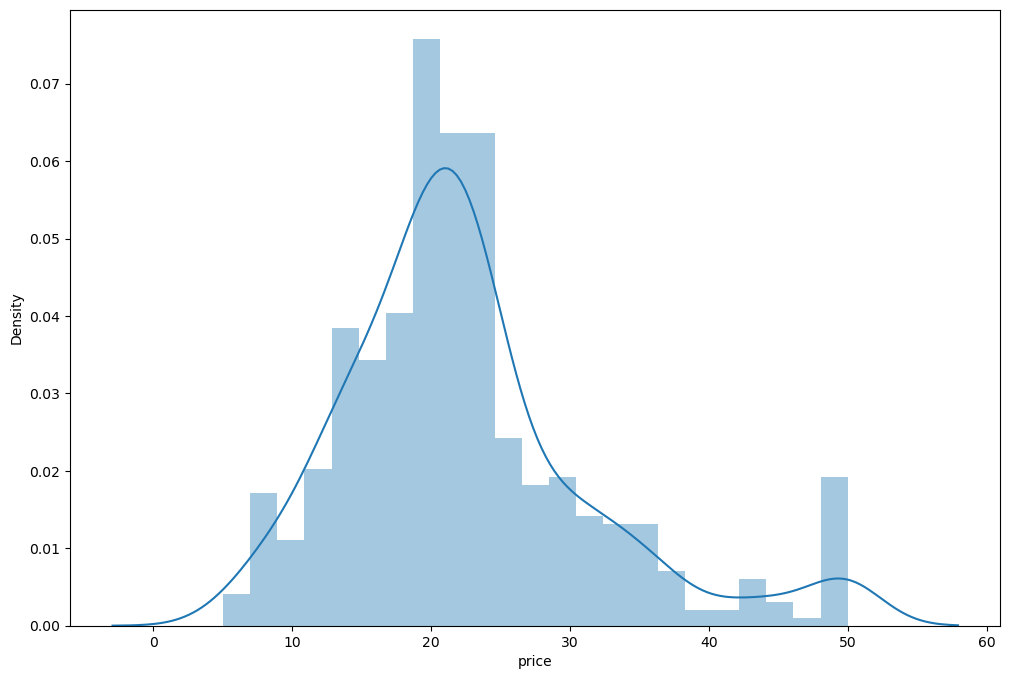

In [28]:
plt.figure(figsize=[12,8])
sns.distplot(data['price'])

In [29]:
correlation= data.corr()
correlation

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.419604,-0.221870,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.293883,0.462047,-0.388305
zone,-0.200469,1.000000,-0.533828,-0.042697,-0.519667,0.310846,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.167381,-0.411003,0.360445
industry,0.406583,-0.533828,1.000000,0.062938,0.756729,-0.394055,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.339263,0.612813,-0.483725
near_river,-0.055892,-0.042697,0.062938,1.000000,0.089707,0.100802,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.041417,-0.051504,0.175260
pollution_level,0.419604,-0.519667,0.756729,0.089707,1.000000,-0.308538,0.728535,-0.768125,0.610222,0.663134,0.191261,-0.382256,0.595874,-0.428244
rooms,-0.221870,0.310846,-0.394055,0.100802,-0.308538,1.000000,-0.233763,0.208751,-0.213882,-0.297467,-0.356164,0.100400,-0.601916,0.693649
age,0.352734,-0.569537,0.644779,0.086518,0.728535,-0.233763,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.247877,0.591502,-0.376955
city_distance,-0.379670,0.664408,-0.708027,-0.099176,-0.768125,0.208751,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.266990,-0.502228,0.249929
highway_connection,0.625505,-0.311948,0.595129,-0.007368,0.610222,-0.213882,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.407118,0.498916,-0.381626
tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.663134,-0.297467,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.409347,0.554263,-0.468536


<Axes: >

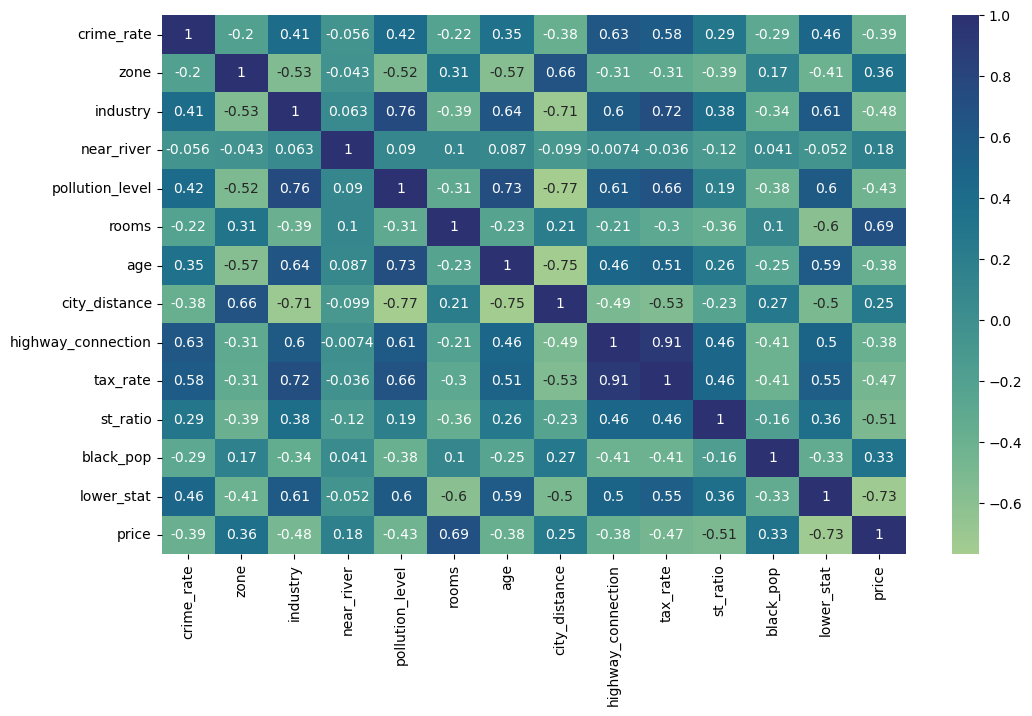

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(correlation, annot=True, cmap='crest')

In [31]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["highway_connection"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [33]:
strat_train_set["highway_connection"].value_counts()

24    105
5      92
4      88
3      30
6      21
2      19
8      19
1      16
7      14
Name: highway_connection, dtype: int64

In [34]:
strat_test_set["highway_connection"].value_counts()

24    27
5     23
4     22
3      8
6      5
2      5
8      5
1      4
7      3
Name: highway_connection, dtype: int64

In [35]:
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 281 to 102
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime_rate          455 non-null    float64
 1   zone                455 non-null    float64
 2   industry            455 non-null    float64
 3   near_river          455 non-null    int64  
 4   pollution_level     455 non-null    float64
 5   rooms               455 non-null    float64
 6   age                 455 non-null    float64
 7   city_distance       455 non-null    float64
 8   highway_connection  455 non-null    int64  
 9   tax_rate            455 non-null    int64  
 10  st_ratio            455 non-null    float64
 11  black_pop           455 non-null    float64
 12  lower_stat          455 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 49.8 KB


In [37]:
y_train.head()

281    35.4
22     15.2
101    26.5
268    43.5
485    21.2
Name: price, dtype: float64

In [38]:
X_train.shape

(455, 13)

In [39]:
X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

In [40]:
X_test.shape

(51, 13)

In [41]:
X_test.head()

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27


In [42]:
cat_feats = X_train[['near_river', 'highway_connection']]

In [43]:
cat_feats.head()

,near_river,highway_connection
281,0,5
22,0,4
101,0,5
268,0,5
485,0,24


In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

cat_feats = X_train[['near_river']]
cat_feats_hot = encoder.fit_transform(cat_feats)
cat_feats_hot


<455x2 sparse matrix of type '<class 'numpy.float64'>'
	with 455 stored elements in Compressed Sparse Row format>

In [45]:
cat_feats_hot= cat_feats_hot.toarray()
cat_feats_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [46]:
from sklearn.pipeline import Pipeline
cat_feats_pipe = Pipeline([
    
    ('encoder', OneHotEncoder())
])
cat_feats_preprocessed = cat_feats_pipe.fit_transform(cat_feats)
cat_feats_preprocessed


<455x2 sparse matrix of type '<class 'numpy.float64'>'
	with 455 stored elements in Compressed Sparse Row format>

In [47]:
cat_feats_preprocessed.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [48]:
num_feats = X_train[['crime_rate', 'zone', 'industry','pollution_level',
       'rooms', 'age', 'city_distance','tax_rate','st_ratio', 'black_pop', 'lower_stat']]
num_feats.head()

,crime_rate,zone,industry,pollution_level,rooms,age,city_distance,tax_rate,st_ratio,black_pop,lower_stat
281,0.03705,20.0,3.33,0.4429,6.968,37.2,5.2447,216,14.9,392.23,4.590000
22,1.23247,0.0,8.14,0.5380,6.142,91.7,3.9769,307,21.0,396.90,12.579653
101,0.11432,0.0,8.56,0.5200,6.781,71.3,2.8561,384,20.9,395.58,7.670000
268,0.54050,20.0,3.97,0.5750,7.470,52.6,2.8720,264,13.0,390.30,3.160000
485,3.67367,0.0,18.10,0.5830,6.312,51.9,3.9917,666,20.2,388.62,10.580000


In [49]:
data.columns

Index(['crime_rate', 'zone', 'industry', 'near_river', 'pollution_level',
       'rooms', 'age', 'city_distance', 'highway_connection', 'tax_rate',
       'st_ratio', 'black_pop', 'lower_stat', 'price'],
      dtype='object')

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

num_feats_pipe = Pipeline([
    ('scalar', StandardScaler())
])
num_feats_preprocessed = num_feats_pipe.fit_transform(num_feats)
num_feats_preprocessed

array([[-0.41694218,  0.34451337, -1.11796605, ..., -1.60174615,
         0.38540028, -1.10661222],
       [-0.2800016 , -0.49972297, -0.42106823, ...,  1.1755678 ,
         0.4382179 ,  0.01494696],
       [-0.40809056, -0.49972297, -0.36021645, ...,  1.13003807,
         0.42328873, -0.67425273],
       ...,
       [-0.41946696,  2.87722238, -1.30921451, ..., -0.64562168,
         0.37081041, -0.91008518],
       [ 0.85728607, -0.49972297,  1.02198836, ...,  0.81132991,
        -2.80831266,  1.51561997],
       [-0.39498096, -0.49972297, -0.36021645, ...,  1.13003807,
        -3.24996749, -0.25873843]])

In [51]:
from sklearn.compose import ColumnTransformer
num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
    ('num', num_feats_pipe, num_list),
    ('cat', cat_feats_pipe, cat_list)
])
X_train_preprocessed = final_pipe.fit_transform(X_train)
X_train_preprocessed.shape

(455, 13)

In [52]:
from sklearn.linear_model import LinearRegression
reg_model= LinearRegression()
reg_model

LinearRegression()

In [53]:
reg_model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [54]:
reg_model.coef_

array([-0.74359552,  0.72749123, -0.37665013, -1.63507278,  2.98556105,
       -0.34036991, -3.25461   ,  0.41548608, -1.84442063,  1.08370831,
       -3.7728724 , -1.51160792,  1.51160792])

In [55]:
reg_model.intercept_

24.000136070006647

In [56]:
y_train_pred = reg_model.predict(X_train_preprocessed)

C:\Users\Grace\AppData\Local\Temp\ipykernel_800\3481287092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)
C:\Users\Grace\AppData\Local\Temp\ipykernel_800\3481287092.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_pred)


<Axes: xlabel='price', ylabel='Density'>

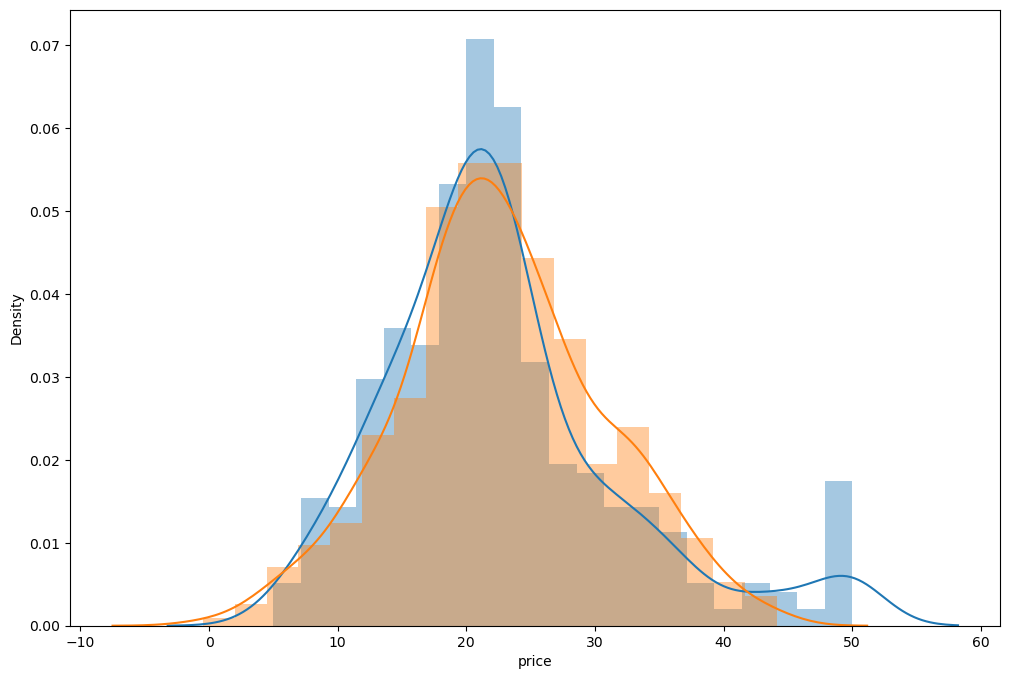

In [57]:
plt.figure(figsize=[12,8])
sns.distplot(y_train)
sns.distplot(y_train_pred)

In [58]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train_pred, y_train)
RMSE = np.sqrt(MSE)
RMSE


4.848548418722815

In [59]:
X_test_preprocessed = final_pipe.fit_transform(X_test)
X_test_preprocessed.shape

(51, 13)

In [60]:
y_test_pred = reg_model.predict(X_test_preprocessed)
MSE_test = mean_squared_error(y_test_pred, y_test)
RMSE_test = np.sqrt(MSE_test)
RMSE_test

4.4149123467033595

In [61]:
X_test_preprocessed.shape

(51, 13)

In [62]:
X_train_preprocessed.shape

(455, 13)

In [63]:
reg_model.score(X_train_preprocessed, y_train)

0.7286167262210151

In [64]:
reg_model.score(X_test_preprocessed, y_test)

0.6878081959597562